In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
sns.set()
plt.style.use('seaborn-whitegrid')

In [4]:
data = pd.read_csv("/Users/nirupam/Desktop/mlproject/INR=X.csv")
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2003-12-01  45.709000  45.728001  45.615002  45.709999  45.709999     0.0
1  2003-12-02  45.709000  45.719002  45.560001  45.629002  45.629002     0.0
2  2003-12-03  45.632000  45.655998  45.474998  45.549999  45.549999     0.0
3  2003-12-04  45.548000  45.612999  45.519001  45.548000  45.548000     0.0
4  2003-12-05  45.549999  45.566002  45.449001  45.449001  45.449001     0.0


In [5]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4821,False,False,False,False,False,False,False
4822,False,False,False,False,False,False,False
4823,False,False,False,False,False,False,False
4824,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Date          0
Open         32
High         32
Low          32
Close        32
Adj Close    32
Volume       32
dtype: int64

In [7]:
data.dropna(axis=0,inplace=True)

In [8]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

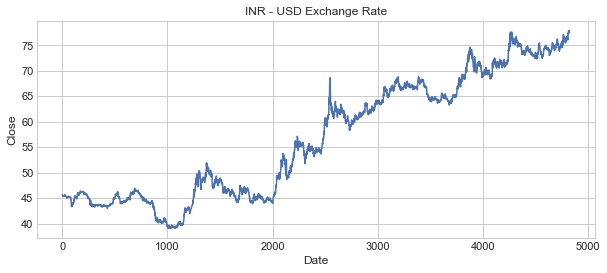

In [9]:
plt.figure(figsize=(10, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.999834  0.999794  0.999898   0.999898     NaN
High       0.999834  1.000000  0.999718  0.999828   0.999828     NaN
Low        0.999794  0.999718  1.000000  0.999786   0.999786     NaN
Close      0.999898  0.999828  0.999786  1.000000   1.000000     NaN
Adj Close  0.999898  0.999828  0.999786  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


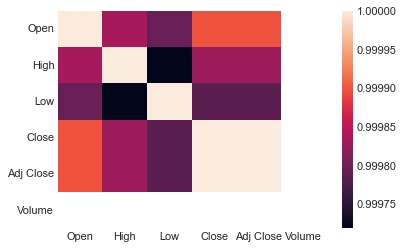

In [10]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [11]:
x = data[["Open", "High", "Low"]]
y = data["Close"]

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
rf = RandomForestRegressor(random_state=42)

In [14]:
rfModel = rf.fit(xtrain,ytrain)

In [15]:
ypred = rfModel.predict(xtest)

In [16]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0        44.01154
1        40.69372
2        46.06415
3        46.35991
4        45.13087


In [17]:
r2 = r2_score(ypred,ytest)
mean = mean_absolute_error(ypred,ytest)
print("r2_score is: ")
print(r2)
print("mean absolute error is: ")
print(mean)

r2_score is: 
0.9998512426944475
mean absolute error is: 
0.08257516445255113
